In [1]:
import pandas as pd

# Navigate up one directory to find the CSV file
csv_path_apr = '../csv/Author_df_apr.csv'
csv_path_jan = '../csv/Author_df_jan.csv'
csv_path_sep = '../csv/Author_df_sep.csv'

# Read the CSV file into a DataFrame
df_author_apr = pd.read_csv(csv_path_apr)
df_author_jan = pd.read_csv(csv_path_jan)
df_author_sep = pd.read_csv(csv_path_sep)

# Filter the DataFrame based on multiple conditions: 'authorVideoCount' and 'duetSetting'
filtered_df_apr = df_author_apr[(df_author_apr['authorVideoCount'] >= 10) & (df_author_apr['duetSetting'] == 0)]

filtered_df_jan = df_author_jan[(df_author_jan['authorVideoCount'] >= 10) & (df_author_jan['duetSetting'] == 0)]

filtered_df_sep = df_author_sep[(df_author_sep['authorVideoCount'] >= 10) & (df_author_sep['duetSetting'] == 0)]


In [2]:
# Calculating 'Reach' metric for two datasets

df_author_jan['authorReach'] = df_author_jan['authorFollowerCount'] + df_author_jan['authorHeartCount'] + df_author_jan['authorVideoCount']

df_author_apr['authorReach'] = df_author_apr['authorFollowerCount'] + df_author_apr['authorHeartCount'] + df_author_apr['authorVideoCount']

df_author_sep['authorReach'] = df_author_sep['authorFollowerCount'] + df_author_sep['authorHeartCount'] + df_author_sep['authorVideoCount']

In [3]:
# Define the boundaries for each tier
bins = [0, 10000, 100000, float('inf')]

# Define the labels for each tier
labels = ['Low', 'Medium', 'High']

# Create a new column called 'PopularityTier'
df_author_jan['PopularityTier'] = pd.cut(df_author_jan['authorReach'], bins=bins, labels=labels)
df_author_apr['PopularityTier'] = pd.cut(df_author_apr['authorReach'], bins=bins, labels=labels)
df_author_sep['PopularityTier'] = pd.cut(df_author_sep['authorReach'], bins=bins, labels=labels)

In [4]:
import numpy as np
import pandas as pd
import re
import string

def preprocess(text):
    if pd.isna(text) or not isinstance(text, str):
        return np.nan
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove newlines
    text = text.replace('\n', ' ')
    
    # Remove newlines and extra whitespace
    text = re.sub('\s+', ' ', text).strip()
    
    # Tokenize and sort tokens
    tokens = sorted(text.split())
    
    # Join tokens back into a string
    text = ' '.join(tokens) 

    return text

# Apply preprocessing to 'signature' columns
df_author_jan['signature_clean'] = df_author_jan['signature'].apply(preprocess)
df_author_apr['signature_clean'] = df_author_apr['signature'].apply(preprocess)
df_author_sep['signature_clean'] = df_author_sep['signature'].apply(preprocess)


In [5]:
print(df_author_sep.columns)

Index(['authorId', 'authorUniqueId', 'avatarLarger', 'avatarMedium',
       'avatarThumb', 'authorDiggCount', 'authorFollowerCount',
       'authorFollowingCount', 'authorHeartCount', 'authorVideoCount',
       'commentSetting', 'downloadSetting', 'duetSetting', 'ftc',
       'isADVirtual', 'nickname', 'openFavorite', 'privateAccount', 'relation',
       'secUid', 'secret', 'signature', 'stitchSetting', 'ttSeller',
       'verified', 'authorReach', 'PopularityTier', 'signature_clean'],
      dtype='object')


In [6]:
# Step 1: Manually rename columns for df_author_sep
df_author_sep.columns = ['{}_sep'.format(col) if col != 'authorId' else col for col in df_author_sep.columns]

# Step 2: Merge DataFrames
# Merge df_author_jan and df_author_apr
merged_1 = pd.merge(df_author_jan, df_author_apr, on='authorId', suffixes=('_jan', '_apr'))

# Merge the result with df_author_sep
merged_df = pd.merge(merged_1, df_author_sep, on='authorId')

# Check the column names to make sure they're what you expect
print("Columns in merged_df:", merged_df.columns)

# Step 3: Filter rows based on the condition
filtered_df = merged_df[
    (merged_df['signature_clean_jan'] != merged_df['signature_clean_apr']) |
    (merged_df['signature_clean_jan'] != merged_df['signature_clean_sep']) |
    (merged_df['signature_clean_apr'] != merged_df['signature_clean_sep'])
]

# Show filtered DataFrame
print(filtered_df)


Columns in merged_df: Index(['authorId', 'authorUniqueId_jan', 'avatarLarger_jan',
       'authorDiggCount_jan', 'authorFollowerCount_jan',
       'authorFollowingCount_jan', 'authorVideoCount_jan',
       'authorHeartCount_jan', 'commentSetting_jan', 'downloadSetting_jan',
       'duetSetting_jan', 'ftc_jan', 'id', 'isADVirtual_jan', 'nickname_jan',
       'openFavorite_jan', 'privateAccount_jan', 'relation_jan', 'secUid_jan',
       'secret_jan', 'signature_jan', 'stitchSetting_jan', 'ttSeller_jan',
       'verified_jan', 'authorReach_jan', 'PopularityTier_jan',
       'signature_clean_jan', 'authorUniqueId_apr', 'avatarLarger_apr',
       'avatarMedium', 'avatarThumb', 'authorDiggCount_apr',
       'authorFollowerCount_apr', 'authorFollowingCount_apr',
       'authorHeartCount_apr', 'authorVideoCount_apr', 'commentSetting_apr',
       'downloadSetting_apr', 'duetSetting_apr', 'ftc_apr', 'isADVirtual_apr',
       'nickname_apr', 'openFavorite_apr', 'privateAccount_apr',
       'relat

In [10]:
print(filtered_df.columns)

Index(['authorId', 'authorUniqueId_jan', 'avatarLarger_jan',
       'authorDiggCount_jan', 'authorFollowerCount_jan',
       'authorFollowingCount_jan', 'authorVideoCount_jan',
       'authorHeartCount_jan', 'commentSetting_jan', 'downloadSetting_jan',
       'duetSetting_jan', 'ftc_jan', 'id', 'isADVirtual_jan', 'nickname_jan',
       'openFavorite_jan', 'privateAccount_jan', 'relation_jan', 'secUid_jan',
       'secret_jan', 'signature_jan', 'stitchSetting_jan', 'ttSeller_jan',
       'verified_jan', 'authorReach_jan', 'PopularityTier_jan',
       'signature_clean_jan', 'authorUniqueId_apr', 'avatarLarger_apr',
       'avatarMedium', 'avatarThumb', 'authorDiggCount_apr',
       'authorFollowerCount_apr', 'authorFollowingCount_apr',
       'authorHeartCount_apr', 'authorVideoCount_apr', 'commentSetting_apr',
       'downloadSetting_apr', 'duetSetting_apr', 'ftc_apr', 'isADVirtual_apr',
       'nickname_apr', 'openFavorite_apr', 'privateAccount_apr',
       'relation_apr', 'secUid_apr'

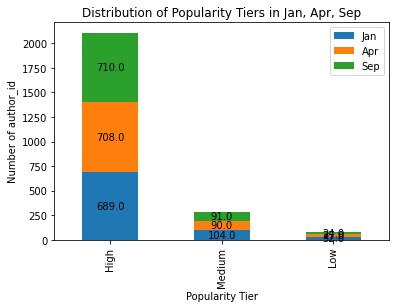

In [9]:
import matplotlib.pyplot as plt

# Count the occurrences of each popularity tier for each month
count_jan = filtered_df['PopularityTier_jan'].value_counts()
count_apr = filtered_df['PopularityTier_apr'].value_counts()
count_sep = filtered_df['PopularityTier_sep'].value_counts()

# Create a new DataFrame to hold these counts
count_df = pd.DataFrame({'Jan': count_jan, 'Apr': count_apr, 'Sep': count_sep}).fillna(0)

# Create the stacked bar chart
ax = count_df.plot(kind='bar', stacked=True)
plt.title('Distribution of Popularity Tiers in Jan, Apr, Sep')
plt.xlabel('Popularity Tier')
plt.ylabel('Number of author_id')

# Annotate with the counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height / 2), ha='center', va='center')

plt.show()


In [11]:
# Select only 'authorId', 'signature_clean_jan', and 'signature_clean_apr' columns
selected_df = filtered_df[['authorId', 'signature_clean_jan', 'signature_jan','signature_clean_apr', 'signature_apr','signature_clean_sep','signature_sep']]

# Display the top rows
print(selected_df.head(3))


              authorId                                signature_clean_jan  \
0  6755279996182348805  am en estadounidense hard hate i i is life mad...   
1  7008216250564805637  ali🌈 broke cheap guide help hi i’m my people t...   
2  6747770185614312453  can digital full how nomad remote time tips to...   

                                       signature_jan  \
0  Estadounidense viviendo en Madriz\nI hate Madr...   
1  Hi, I’m Ali🌈\n🌸I help people travel cheap\n👇🏼g...   
2  Digital Nomad w/ Remote Work Tips\nHow You Can...   

                                 signature_clean_apr  \
0  am en estadounidense hard hate i i is life mad...   
1  ali🌈 budget budget guide hi i’m share solo tip...   
2  can digital full how nomad remote time tips to...   

                                       signature_apr  \
0  Estadounidense viviendo en Madriz\nI hate Madr...   
1  Hi, I’m Ali🌈\n🧚‍♀️I share solo + budget travel...   
2  Digital Nomad w/ Remote Work Tips\nHow You Can...   

                

In [12]:
#Save the file to csv
selected_df.to_csv('changed_signatures_raw_signatures.csv', index=False)

In [13]:
# extract all emojis from a given string using a list comprehension

from emoji import EMOJI_DATA
from emojiflags.lookup import lookup
import string

# Function to check if a character is a flag emoji
def is_flag_emoji(c):
    if len(c) != 2:
        return False
    return all(0x1F1E6 <= ord(char) <= 0x1F1FF for char in c)

# Function to extract all emojis from a string
def extract_emojis(text):
    if not isinstance(text, str):
        return ''
    
    emojis = ''.join(c for c in text if c in EMOJI_DATA)
    
    # Check for flag emojis
    for i in range(len(text) - 1):
        pair = text[i:i+2]
        if is_flag_emoji(pair):
            emojis += pair
            
    return emojis

# A copy of your selected data slice
filtered_string_df = selected_df.copy()

filtered_string_df['emojis_jan'] = filtered_string_df['signature_clean_jan'].apply(extract_emojis)
filtered_string_df['emojis_apr'] = filtered_string_df['signature_clean_apr'].apply(extract_emojis)
filtered_string_df['emojis_sep'] = filtered_string_df['signature_clean_sep'].apply(extract_emojis)
# Now you can proceed to the code for counting occurrences and calculating probabilities.


In [14]:
#Working on emojis in the dataset

# Count the number of rows with emojis in January
count_emojis_jan = filtered_string_df[filtered_string_df['emojis_jan'].apply(len) > 0].shape[0]

# Count the number of rows with emojis in April
count_emojis_apr = filtered_string_df[filtered_string_df['emojis_apr'].apply(len) > 0].shape[0]

# Count the number of rows with emojis in Sep
count_emojis_sep = filtered_string_df[filtered_string_df['emojis_sep'].apply(len) > 0].shape[0]


print(f"Number of rows with emojis in January: {count_emojis_jan}")
print(f"Number of rows with emojis in April: {count_emojis_apr}")
print(f"Number of rows with emojis in Sep: {count_emojis_sep}")


Number of rows with emojis in January: 651
Number of rows with emojis in April: 656
Number of rows with emojis in Sep: 643


In [19]:
emoji_to_identity = {
    '🌟': 'Achiever',
    '⭐': 'Achiever',
    '💯': 'Achiever',
    '🚀': 'Achiever',
    '💫': 'Achiever',
    '⚡': 'Achiever',
    '💵': 'Achiever',
    '👑': 'Achiever',
    '📝': 'Achiever',
    '📌': 'Achiever',
    '🔥': 'Achiever',
    '🤘': 'Achiever',
    '🏃': 'Achiever',
    '🛍': 'Achiever',
    '💪': 'Achiever',
    '🙋': 'Achiever',
    '💸': 'Achiever',
    '💲': 'Achiever',
    '🥇': 'Achiever',
    '🚨': 'Achiever',
    '🏄': 'Adventurous',
    '🤸': 'Adventurous',
    '🪂': 'Adventurous',
    '🛹': 'Adventurous',
    '🌊': 'Adventurous',
    '👙': 'Beach lover',
    '🏝': 'Beach lover',
    '🐚': 'Beach lover',
    '🏖': 'Beach lover',
    '🥥': 'Beach lover',
    '🌺': 'Beach lover',
    '🌸': 'Beach lover',
    '☀️': 'Beach lover',
    '🎂': 'Social',
    '😁': 'Social',
    '🤝': 'Collaborative',
    '👋': 'Collaborative',
    '🧡': 'Loving',
    '🔗': 'Collaborative',
    '💃': 'Social',
    '🥂': 'Social',
    '🍻': 'Social',
    '🙏': 'Social',
    '🗣': 'Social',
    '🚍': 'Traveler',
    '💁': 'Collaborative',
    '📺': 'Couch potato',
    '🤠': 'Country lover',
    '💜': 'Creative',
    '🪄': 'Creative',
    '💡': 'Creative',
    '✂': 'Creative',
    '🎥': 'Creative',
    '📽': 'Creative',
    '📚': 'Creative',
    '🧠': 'Creative',
    '📸': 'Creative',
    '📷': 'Creative',
    '🎙': 'Creative',
    '🎤': 'Creative',
    '✍': 'Creative',
    '🤎': 'Loving',
    '🌱': 'Eco-friendly',
    '🎓': 'Educated',
    '💍': 'Engaged',
    '🌲': 'Environmentalist',
    '♀': 'Female',
    '🏋': 'Fitness enthusiast',
    '🍴': 'Foodie',
    '🍕': 'Foodie',
    '🥐': 'Foodie',
    '🍆': 'Foodie',
    '🦋': 'Free spirit',
    '🆓': 'Free spirit',
    '🎮': 'Gamer',
    '🤪': 'Social',
    '📈': 'Growth-oriented',
    '😊': 'Social',
    '🐝': 'Hardworking',
    '🥑': 'Foodie',
    '✌': 'Collaborative',
    '🏡': 'Homebody',
    '🏠': 'Homebody',
    '🤍': 'Loving',
    '💕': 'Loving',
    '🥰': 'Loving',
    '💖': 'Loving',
    '😍': 'Loving',
    '💞': 'Loving',
    '💙': 'Loving',
    '♂': 'Masculine',
    '🧜': 'Adventurous',
    '🌿': 'Nature lover',
    '🍄': 'Nature lover',
    '🌙': 'Achiever',
    '🌏': 'Traveler',
    '🌍': 'Traveler',
    '🌏': 'Traveler',
    '🇺🇸': 'American',
    '🇨🇦': 'Canadian',
    '🇩🇪': 'German',
    '🇬🇧': 'British',
    '🇪🇺': 'European',
    '🇪🇸': 'Spain',
    '🇳🇱': 'Dutch',
    '🇮🇹': 'Italian',
    '✈️': 'Traveler',
    '🇨🇴': 'Colombian',
    '🇹🇹': 'Thailand',
    '🇸🇬': 'Polish',
    '🇫🇷': 'French',  
    '🇵🇹': 'Portugal',
    '🇷🇴': 'Romania',
    '🌈': 'LGBTQ+',
    '🇮🇹': 'Italian',
    '🇺🇸': 'American',
    '🇪🇪': 'Estonian',
    '🇷🇺': 'Russian',
    '💻': 'Tech-savvy',
    '🌴': 'Beach-lover',
    '💰': 'Achiever',
    '✨': 'Achiever',
    '🇬🇪': 'Georgian',
    '🇮🇷': 'Romanian',
    '⬇️': 'Collaborative',
    '🇵🇪': 'Peruan',
    '🇨🇺': 'Cubana',
    '🇩🇴': 'Dominican',
    '🇹🇭': 'Thai',
    '🇦🇷': 'Argentinian',
    '🇲🇽': 'Mexican',
    '🇦🇺': 'Aussie',
    '🇹🇼': 'Taiwanese',
    '🇰🇷': 'South Korean',
    '🇵🇭': 'Filipino',
    '🇵🇦': 'Panamanian',
    '🇵🇾': 'Paraguayan',
    '🇻🇳': 'Vietnamese',
    '🇰🇪': 'Kenyan',
    '🇦🇱': 'Albanian',
    '🇧🇴': 'Bolivian',
    '🇧🇬': 'Bulgarian',
    '🇰🇬': 'Kyrgyzstani',
    '🇫🇮': 'Finish',
    '🇩🇰': 'Danish',
    '↘️': 'Collaborative',
    '↙️': 'Collaborative',
    '⬆️': 'Collaborative',
    '⏬': 'Collaborative',
    '⏬': 'Collaborative',
    '⤵️': 'Collaborative'

}

In [20]:
# Function to replace emojis in a string with their corresponding identity labels
def replace_emojis_with_labels(text, emoji_to_identity):
    if pd.isna(text) or not isinstance(text, str):
        return text
    
    for emoji, identity in emoji_to_identity.items():
        text = text.replace(emoji, identity)
    
    return text

# Assuming e'moji_to_identity' is your emoji-to-identity mapping dictionary

filtered_string_df['signature_clean_jan'] = filtered_string_df['signature_clean_jan'].apply(lambda x: replace_emojis_with_labels(x, emoji_to_identity))
filtered_string_df['signature_clean_apr'] = filtered_string_df['signature_clean_apr'].apply(lambda x: replace_emojis_with_labels(x, emoji_to_identity))
filtered_string_df['signature_clean_sep'] = filtered_string_df['signature_clean_sep'].apply(lambda x: replace_emojis_with_labels(x, emoji_to_identity))

In [21]:
# Function to remove any remaining emojis from a string
import re

def remove_remaining_emojis(text):
    if pd.isna(text) or not isinstance(text, str):
        return text
    
    # The regex pattern below should match most emojis
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbat symbols
        "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

# Apply the function to remove remaining emojis
filtered_string_df['signature_clean_jan'] = filtered_string_df['signature_clean_jan'].apply(remove_remaining_emojis)
filtered_string_df['signature_clean_apr'] = filtered_string_df['signature_clean_apr'].apply(remove_remaining_emojis)
filtered_string_df['signature_clean_sep'] = filtered_string_df['signature_clean_sep'].apply(remove_remaining_emojis)

In [22]:
print(filtered_string_df['signature_clean_apr'].sample(50))


324     groups helping here retreats smarter solo star...
504     follow ig inayahtravels inspiring me on the tr...
991     best find hidden in locations place the the to uk
72      32 an budget countries diary guides introvert ...
1233                                                  NaN
356     a blog bloggers budget lifestyle on travel us ...
959     business creating dream girl life my travel uk...
1208    155197 300k 3878 countries days for ig traveli...
417     animals artist explorer nature vegan visual ️ ...
1156            and cat content scotland sometimes travel
1392    attitude biz entrepreneur global gratitude hea...
397     bc livmore videographer   Beach lover vancouve...
874     22 and aussie community free how join learn my...
352     a coach life manager me media of podcast socia...
315     adénora aménage de ebook france mon tao ton to...
21      30 collegedropout digitalnomad nyc softwareeng...
288     extraordinaire fille kimdns ordinaire qui snap...
904       blog

In [24]:
print(filtered_string_df.head)

<bound method NDFrame.head of                  authorId                                signature_clean_jan  \
0     6755279996182348805  am en estadounidense hard hate i i is life mad...   
1     7008216250564805637  aliLGBTQ+ broke cheap guide help hi i’m my peo...   
2     6747770185614312453  can digital full how nomad remote time tips to...   
3     6764845416200307717  and diary digital guides inspo my tips travel ...   
5     6856959999605359622  a created fulltime life of sharing travel Trav...   
...                   ...                                                ...   
1441  7049550076327117829  a abundant assist business create i’d love luc...   
1442  7124787265452835882  2007 for from hiremymomcom home moms original ...   
1443  6753383386101023750  at author beamably ceo coming happy leadership...   
1444  6797371836260336645  a as corporate humour life my remote remote ti...   
1446  6918418693689426949                 Achiever️ 𝒞𝓇𝑒𝒹𝒾𝓉 𝒬𝓊𝑒𝑒𝓃Achiever 𝒲𝐹𝐻   

         

In [25]:
#Save the file to csv
filtered_string_df.to_csv('changed_signatures_raw_data.csv', index=False)


In [56]:
# calculating probabilites of the emojis in the dataset

# Concatenate all emojis into a single string for January dataset
all_emojis_jan = ''.join(filtered_string_df['emojis_jan'])

# Count the occurrences of each unique emoji
emoji_counts_jan = {}
for emoji_char in set(all_emojis_jan):
    emoji_counts_jan[emoji_char] = all_emojis_jan.count(emoji_char)

# Calculate the empirical probabilities
total_emojis_jan = len(all_emojis_jan)
emoji_probabilities_jan = {emoji: count / total_emojis_jan for emoji, count in emoji_counts_jan.items()}


In [57]:
# Sort by probability
sorted_emoji_probabilities_jan = {k: v for k, v in sorted(emoji_probabilities_jan.items(), key=lambda item: item[1], reverse=True)}

# Print sorted probabilities
print("Sorted Emoji Probabilities in 'signature_clean_jan':")
for emoji, prob in sorted_emoji_probabilities_jan.items():
    print(f"{emoji}: {prob}")


Sorted Emoji Probabilities in 'signature_clean_jan':
👇: 0.06174142480211082
⬇: 0.056464379947229554
📍: 0.04696569920844327
✨: 0.043799472295514515
🏼: 0.0316622691292876
🌎: 0.027440633245382585
🏻: 0.025329815303430078
💻: 0.02321899736147757
✈: 0.02321899736147757
🇸: 0.022691292875989446
🇺: 0.01899736147757256
💌: 0.017941952506596307
🇨: 0.016886543535620052
🇦: 0.016886543535620052
🇷: 0.0158311345646438
👩: 0.01424802110817942
🇹: 0.01424802110817942
🌍: 0.013192612137203167
🇪: 0.012664907651715039
🌈: 0.011609498680738786
💸: 0.01108179419525066
🏽: 0.010026385224274407
♀: 0.00949868073878628
🇬: 0.00949868073878628
🇭: 0.00949868073878628
💰: 0.00949868073878628
🫶: 0.008970976253298154
🇵: 0.0079155672823219
📲: 0.007387862796833773
💵: 0.006860158311345646
📧: 0.006860158311345646
🚐: 0.006860158311345646
🔥: 0.0063324538258575196
❤: 0.0063324538258575196
⤵: 0.0063324538258575196
⚡: 0.005804749340369393
🌴: 0.005804749340369393
📸: 0.005804749340369393
🏾: 0.005804749340369393
📩: 0.005804749340369393
➡:

In [63]:
# Concatenate all emojis into a single string for April dataset
all_emojis_apr = ''.join(filtered_string_df['emojis_apr'])

# Count the occurrences of each unique emoji
emoji_counts_apr = {}
for emoji_char in set(all_emojis_apr):
    emoji_counts_apr[emoji_char] = all_emojis_apr.count(emoji_char)

# Calculate the empirical probabilities
total_emojis_apr = len(all_emojis_apr)
emoji_probabilities_apr = {emoji: count / total_emojis_apr for emoji, count in emoji_counts_apr.items()}


In [64]:
# Sort by probability
sorted_emoji_probabilities_apr = {k: v for k, v in sorted(emoji_probabilities_apr.items(), key=lambda item: item[1], reverse=True)}

# Print sorted probabilities
print("Sorted Emoji Probabilities in 'signature_clean_apr':")
for emoji, prob in sorted_emoji_probabilities_apr.items():
    print(f"{emoji}: {prob}")

Sorted Emoji Probabilities in 'signature_clean_apr':
👇: 0.08836617927527018
⬇: 0.06929434202161475
📍: 0.052765416401780035
✨: 0.0508582326764145
🏼: 0.03877940241576605
✈: 0.03305785123966942
🏻: 0.029879211697393517
💌: 0.027972027972027972
🌎: 0.024157660521296885
💻: 0.023521932612841703
📧: 0.017800381436745075
👩: 0.017164653528289893
🌈: 0.014621741894469168
🌍: 0.013986013986013986
🏽: 0.013350286077558804
💰: 0.01144310235219326
🫶: 0.010171646535282899
💸: 0.010171646535282899
📲: 0.009535918626827717
🌴: 0.008900190718372537
⚡: 0.008264462809917356
📸: 0.008264462809917356
✉: 0.008264462809917356
♀: 0.008264462809917356
📩: 0.008264462809917356
🏝: 0.007628734901462174
🏳: 0.007628734901462174
❤: 0.007628734901462174
⤵: 0.006993006993006993
🤍: 0.006357279084551812
➡: 0.006357279084551812
🏾: 0.006357279084551812
🔥: 0.0050858232676414495
🌊: 0.0050858232676414495
🌏: 0.0050858232676414495
🚐: 0.0050858232676414495
🗺: 0.0050858232676414495
🚀: 0.0050858232676414495
🌲: 0.0050858232676414495
♂: 0.005085